### 1. Perform thresholding on a grayscale image to seperate the foreground from the background. Experiment with different threshold values and methods (eg. global vs adptive thresholding)


Importing the required libraries:

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Loading the image:

In [42]:
image = cv2.imread('Art.png')

Converting the image to grayscale:

In [43]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Applying global thresholding:

In [44]:
_, global_threshold = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

Applying adaptive thresholding:

In [45]:
adaptive_threshold = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

Displaying the images:

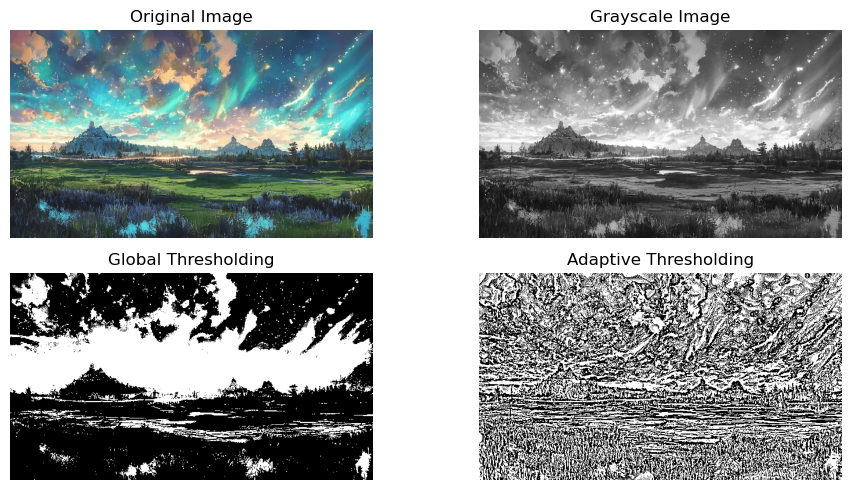

In [54]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(global_threshold, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(adaptive_threshold, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()

### 2. Implement k-menas clustering for color image segmentation. Discuss how the number of clusters affectsthe segmentation outcome.

Importing the required libraries:

In [46]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

Loading the image:

In [47]:
image2 = cv2.imread('Art.png')
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Reshaping the image into a 2D array of pixels:

In [48]:
pixels = image2.reshape(-1, 3)

Defining the number of clusters:

In [65]:
num_clusters = 5

Performing K-means clustering:

In [66]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

Getting the cluster centroids and labels:

In [67]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

Reshaping the labels into the original image shape:

In [68]:
segmented_image = labels.reshape(image2.shape[:2])

Displaying the images:

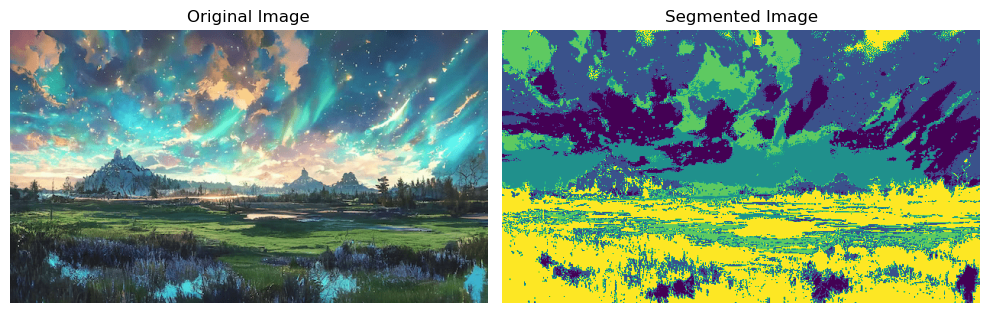

In [69]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')  
plt.title('Segmented Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### How the number of CLUSTERS affects the SEGMENTATION OUTCOME:

Under-Segmentation:   
When the number of clusters is too low, K-means may merge distinct color regions into a single cluster. Resulting in loss of details and smoothening of boundaries between different objects in the image. For example, in an image with many color gradients, using a small number of clusters might not capture all the color variations, leading to under-segmentation.

Over-Segmentation:\
Conversely, if the number of clusters is too high, K-means may divide similar colors into separate clusters. This can lead to excessive segmentation, where neighboring pixels of the same object are assigned to different clusters. Over-segmentation results in fragmented regions and noisy segmentation masks, making it challenging to discern distinct objects.

Balanced Segmentation:\
The optimal number of clusters strikes a balance between capturing fine color variations and avoiding excessive fragmentation. It depends on the complexity of the image, the diversity of colors present, and the desired level of segmentation detail. Typically, domain knowledge or visual inspection is used to determine a suitable number of clusters.